In [25]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [26]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [27]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [28]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# compile 호출
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
# 11번째가 가장 좋을때 20번까지 실행을 시킬 필요가 없음.
# 조기 종료

# ModelCheckpoint: 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료
# patience=2 : 손실값이 2번이상 증가되면 종료
# restore_best_weights=True : 뒤로 back을 해서 가장 좋은 모델의 위치
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7378 - loss: 0.7580 - val_accuracy: 0.8400 - val_loss: 0.4388
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8408 - loss: 0.4385 - val_accuracy: 0.8418 - val_loss: 0.4112
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8552 - loss: 0.4023 - val_accuracy: 0.8628 - val_loss: 0.3696
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8628 - loss: 0.3753 - val_accuracy: 0.8728 - val_loss: 0.3399
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8670 - loss: 0.3618 - val_accuracy: 0.8680 - val_loss: 0.3577
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8711 - loss: 0.3464 - val_accuracy: 0.8748 - val_loss: 0.3388
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3406 - val_accuracy: 0.8752 - val_loss: 0.3346
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3307 - 

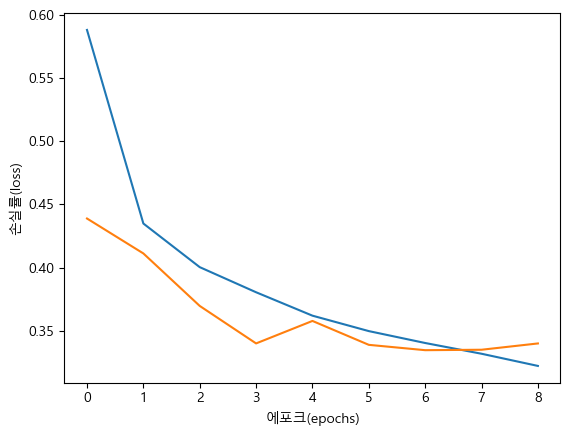

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.show()

In [34]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8758 - loss: 0.3339


[0.33456408977508545, 0.875166654586792]

In [ ]:
early_stopping_cb.stopped

In [ ]:
# 딥러닝 훈련
# 모델결정 model = keras.Sequential()
# Flatten 추가 model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가 model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃 추가 model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제 적용
# Dense층 추가 model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기 종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                   validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early,stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)